### Packages

In [1]:
using DynamicalSystems, DifferentialEquations, OrdinaryDiffEq, StaticArrays
using CairoMakie

### function system

In [461]:
U(y) = U0 + ΔU0 / ( 1 + exp( -50 * ( y - ythr ) ) )
σ(x)= 1 / (1 + exp(-20 * (x - xthr)));

In [462]:
function model(u, p ,t)
    E, x, u_, y = u
    τ, α, τ_D, J, U0, ΔU0, τ_y, β, xthr, ythr, I0 = p
    du1 = (-E + α * log( 1 + exp( ( J * u_ * x * E + I0 ) / α ) )) / τ
    du2 = ( 1 - x ) / τ_D - u_ * x * E
    du3 = (U(y) - u_) / τ_F + U(y) * ( 1 - u_ ) * E
    du4 = -y /  τ_y + β * σ(x)
    return SVector(du1, du2, du3, du4)
end;

### Parametres

In [469]:
tspan = (0.0, 500.0);

In [861]:
τ = 0.013; τ_D = 0.15; τ_y = 1.8; τ_F = 1;
α = 1.5; J = 3.07; β = 0.4375
U0 = 0.32; ΔU0 = 0.305
xthr = 0.9; ythr = 0.5
I0 = -1.5;
p = SA[τ, α, τ_D, J, U0, ΔU0, τ_y, β, xthr, ythr, I0]

11-element SVector{11, Float64} with indices SOneTo(11):
  0.013
  1.5
  0.15
  3.07
  0.32
  0.305
  1.8
  0.4375
  0.9
  0.5
 -1.5

In [862]:
# tr[end, :] # 
u0 = [3.149489285504324, 0.4716568359280646, 0.8471135917463137, 0.006055763912356748]
ds = ContinuousDynamicalSystem(model, u0, p)
tr = trajectory(ds, tspan[2], Ttr = tspan[2]; Δt = 0.001, diffeq = (alg = RK4(),  adaptive = false, dense = false, dt = 0.001))

4-dimensional Dataset{Float64} with 500001 points
 9.76073  0.449911  0.835089  9.70008e-5
 9.76073  0.449911  0.835089  9.70008e-5
 9.76073  0.449911  0.835089  9.70008e-5
 9.76073  0.449911  0.835089  9.70008e-5
 9.76073  0.449911  0.835089  9.70008e-5
 9.76073  0.449911  0.835089  9.70008e-5
 9.76073  0.449911  0.835089  9.70008e-5
 9.76073  0.449911  0.835089  9.70008e-5
 9.76073  0.449911  0.835089  9.70008e-5
 9.76073  0.449911  0.835089  9.70008e-5
 9.76073  0.449911  0.835089  9.70008e-5
 9.76073  0.449911  0.835089  9.70008e-5
 9.76073  0.449911  0.835089  9.70008e-5
 ⋮                            
 9.76073  0.449911  0.835089  9.70008e-5
 9.76073  0.449911  0.835089  9.70008e-5
 9.76073  0.449911  0.835089  9.70008e-5
 9.76073  0.449911  0.835089  9.70008e-5
 9.76073  0.449911  0.835089  9.70008e-5
 9.76073  0.449911  0.835089  9.70008e-5
 9.76073  0.449911  0.835089  9.70008e-5
 9.76073  0.449911  0.835089  9.70008e-5
 9.76073  0.449911  0.835089  9.70008e-5
 9.76073  0.44991

In [863]:
# tr1[end, :] # 
u01 = [0.0, 0.2, 0.1, 0.1]
ds1 = ContinuousDynamicalSystem(model, u01, p)
tr1 = trajectory(ds1, tspan[2], Ttr = tspan[2]; Δt = 0.001, diffeq = (alg = RK4(),  adaptive = false, dense = false, dt = 0.001))

4-dimensional Dataset{Float64} with 500001 points
 9.76073  0.449911  0.835089  9.70008e-5
 9.76073  0.449911  0.835089  9.70008e-5
 9.76073  0.449911  0.835089  9.70008e-5
 9.76073  0.449911  0.835089  9.70008e-5
 9.76073  0.449911  0.835089  9.70008e-5
 9.76073  0.449911  0.835089  9.70008e-5
 9.76073  0.449911  0.835089  9.70008e-5
 9.76073  0.449911  0.835089  9.70008e-5
 9.76073  0.449911  0.835089  9.70008e-5
 9.76073  0.449911  0.835089  9.70008e-5
 9.76073  0.449911  0.835089  9.70008e-5
 9.76073  0.449911  0.835089  9.70008e-5
 9.76073  0.449911  0.835089  9.70008e-5
 ⋮                            
 9.76073  0.449911  0.835089  9.70008e-5
 9.76073  0.449911  0.835089  9.70008e-5
 9.76073  0.449911  0.835089  9.70008e-5
 9.76073  0.449911  0.835089  9.70008e-5
 9.76073  0.449911  0.835089  9.70008e-5
 9.76073  0.449911  0.835089  9.70008e-5
 9.76073  0.449911  0.835089  9.70008e-5
 9.76073  0.449911  0.835089  9.70008e-5
 9.76073  0.449911  0.835089  9.70008e-5
 9.76073  0.44991

In [864]:
ds

4-dimensional continuous dynamical system
 state:       [3.14949, 0.471657, 0.847114, 0.00605576]
 rule f:      model
 in-place?    false
 jacobian:    ForwardDiff
 parameters:  [0.013, 1.5, 0.15, 3.07, 0.32, …, 1.8, 0.4375, 0.9, 0.5, -1.5]

In [865]:
ds1

4-dimensional continuous dynamical system
 state:       [0.0, 0.2, 0.1, 0.1]
 rule f:      model
 in-place?    false
 jacobian:    ForwardDiff
 parameters:  [0.013, 1.5, 0.15, 3.07, 0.32, …, 1.8, 0.4375, 0.9, 0.5, -1.5]

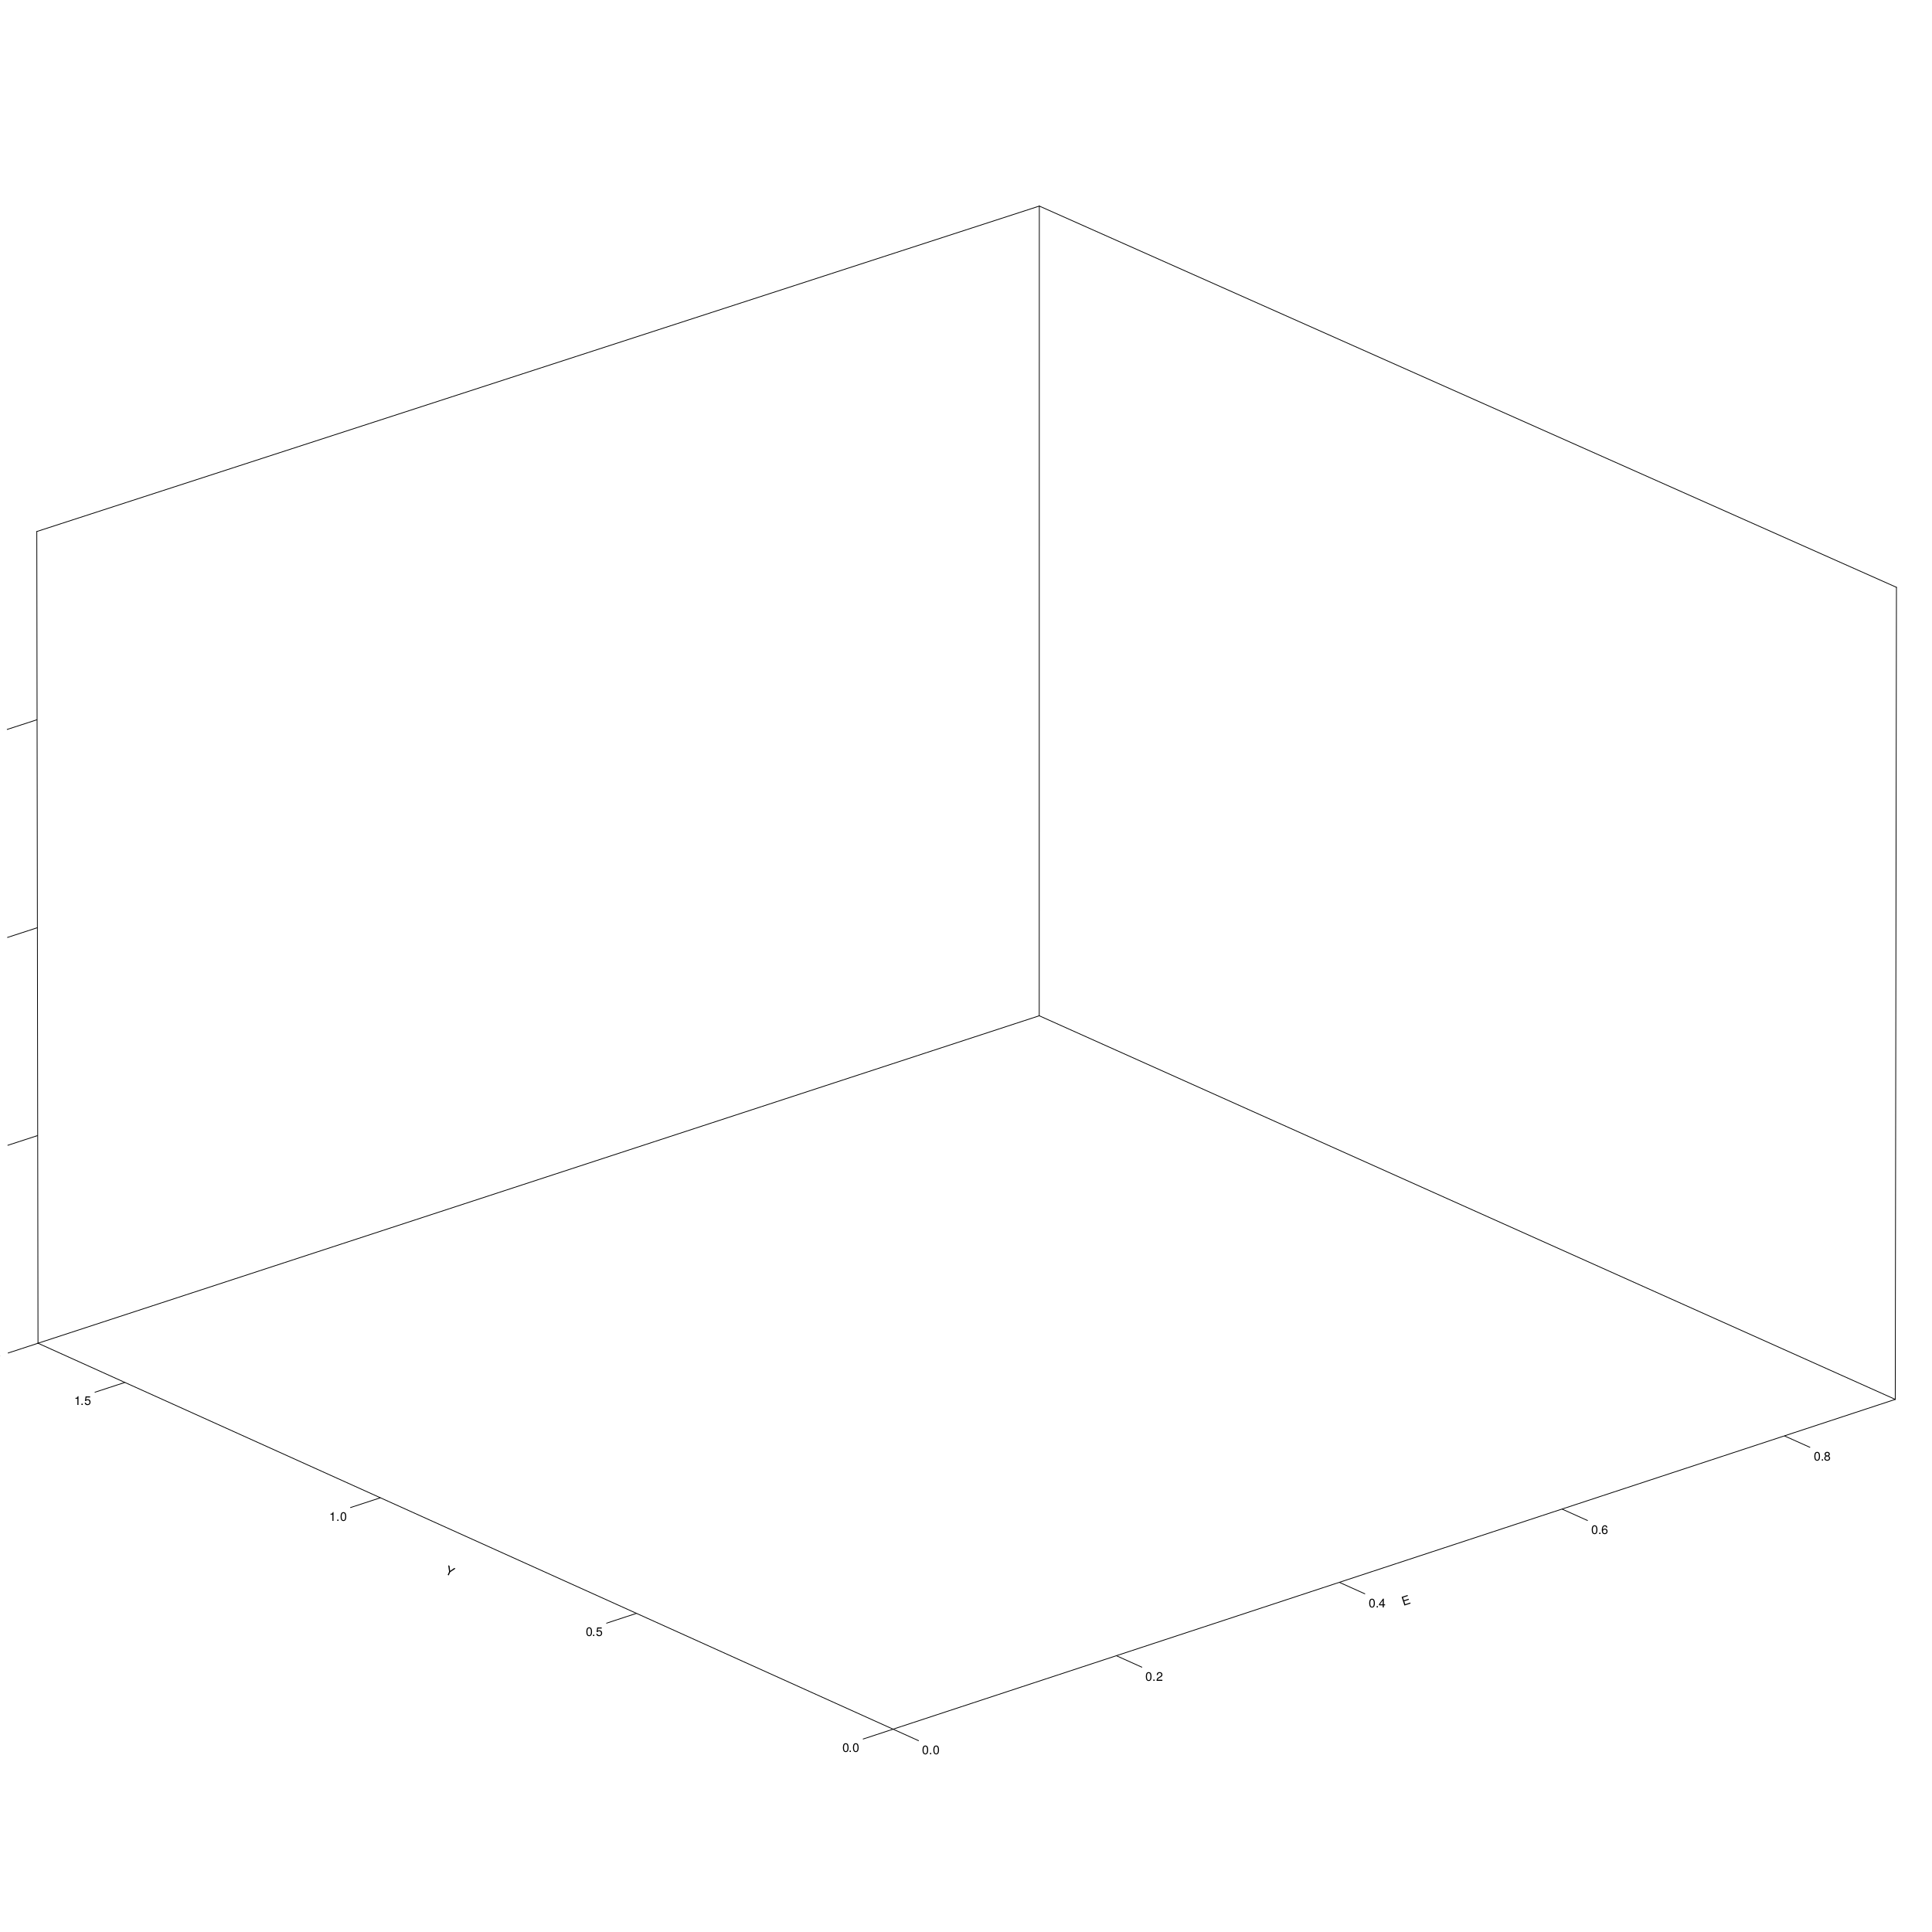

In [866]:
cord1 = 2
cord2 = 3
cord3 = 1
ts, tf = 420000, 430000

f = Figure(resolution = (2500, 2500))
ax = Axis3(f[1, 1], xlabel = "E", ylabel = "Y", zlabel = "u")
ax.xgridvisible = false
ax.ygridvisible = false
ax.zgridvisible = false
lines!(tr[ts:tf, cord1], tr[ts:tf, cord2], tr[ts:tf, cord3], linewidth = 8, color = "orange")

lines!(tr1[ts:tf, cord1], tr1[ts:tf, cord2], tr1[ts:tf, cord3], linewidth = 4, color = "black")
f

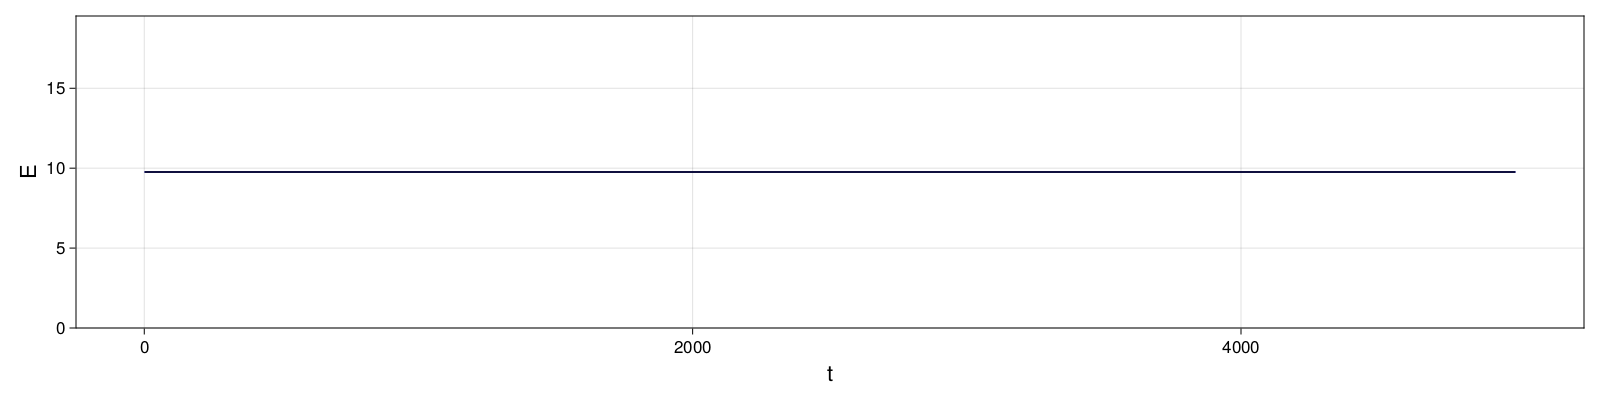

In [867]:
ts, tf = 420000, 425000

f = Figure(resolution = (1600, 400))
ax1 = Axis(f[1, 1], xlabel = "t", ylabel = "E", xlabelsize = 22, ylabelsize = 22,xticklabelsize = 17, yticklabelsize = 17)
#ax2 = Axis(f[2, 1], xlabel = "t", ylabel = "X, u, Y", xlabelsize = 22, ylabelsize = 22,xticklabelsize = 17, yticklabelsize = 17)

lines!(ax1, tr[ts:tf, 1], color = "blue", label = "E")
lines!(ax1, tr1[ts:tf, 1], color = "black", label = "E")

#lines!(ax2, tr[ts:tf, 2], color = "red", label = "X")
#lines!(ax2, tr[ts:tf, 3], color = "green", label = "u")
#lines!(ax2, tr[ts:tf, 4], color = "orange", label = "Y")


"""
ax1.xgridvisible = false
ax1.ygridvisible = false
ax2.xgridvisible = false
ax2.ygridvisible = false"""

f